<a href="https://colab.research.google.com/github/Vishal20rv/Eye-disease-detection/blob/main/classy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataset_dir = '/content/drive/MyDrive/Image Set'
train_dir = '/content/drive/MyDrive/train'
test_dir = '/content/drive/MyDrive/test'


Image path: /content/drive/MyDrive/Image Set/chris_evans/-  (1).jpg


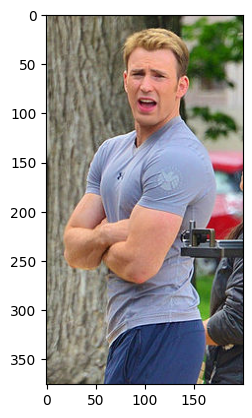


Image path: /content/drive/MyDrive/Image Set/chris_hemsworth/- .jpg


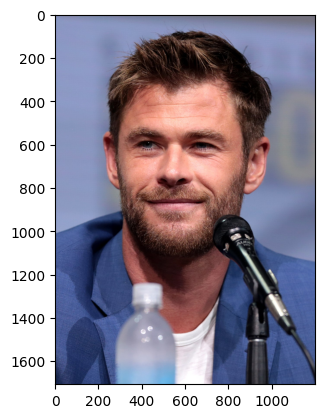


Image path: /content/drive/MyDrive/Image Set/mark_ruffalo/- .jpg


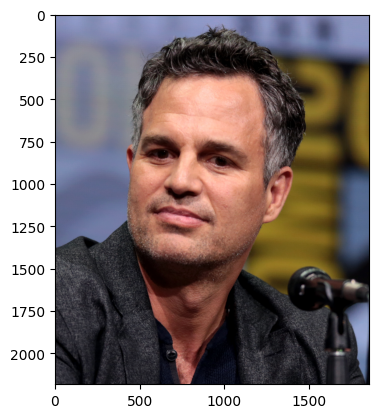


Image path: /content/drive/MyDrive/Image Set/robert_downey_jr/(This Is How Robert Downey Jr Became.jpg


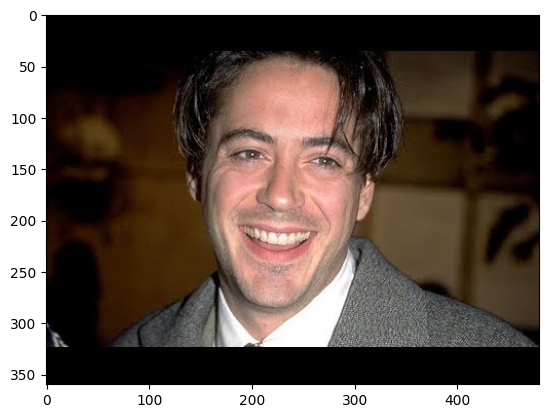


Image path: /content/drive/MyDrive/Image Set/scarlett_johansson/- .jpg


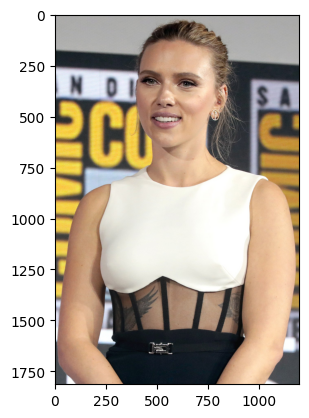

In [31]:
from PIL import Image
import os
import matplotlib.pyplot as plt

# List all folders in the dataset directory
folders = sorted([f.path for f in os.scandir(dataset_dir) if f.is_dir()])

for folder in folders:
    images = sorted([f.path for f in os.scandir(folder) if f.is_file() and f.name.endswith(('.jpg', '.jpeg', '.png'))])

    for image_path in images[:1]:
        print(f"Image path: {image_path}")
        image = Image.open(image_path)
        plt.imshow(image)
        plt.show()
    print()

In [ ]:
import os
import shutil
import random
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
classes = os.listdir(dataset_dir)
train_ratio = 0.8  # 80% for training, 20% for testing

for cls in classes:
    cls_dir = os.path.join(dataset_dir, cls)
    images = os.listdir(cls_dir)
    random.shuffle(images)
    split_idx = int(train_ratio * len(images))

    train_images = images[:split_idx]
    test_images = images[split_idx:]

    train_cls_dir = os.path.join(train_dir, cls)
    test_cls_dir = os.path.join(test_dir, cls)
    os.makedirs(train_cls_dir, exist_ok=True)
    os.makedirs(test_cls_dir, exist_ok=True)

    for img in train_images:
        src_path = os.path.join(cls_dir, img)
        dst_path = os.path.join(train_cls_dir, img)
        shutil.copy(src_path, dst_path)

    for img in test_images:
        src_path = os.path.join(cls_dir, img)
        dst_path = os.path.join(test_cls_dir, img)
        shutil.copy(src_path, dst_path)

print("Train-test split completed successfully.")


In [5]:
train_data_dir = '/content/drive/MyDrive/train'
test_data_dir = '/content/drive/MyDrive/test'
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
 rescale=1./255,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
 train_data_dir,
 target_size=(224, 224),
 batch_size=32,
 class_mode='sparse'
)
test_datagen =tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
 test_data_dir,
 target_size=(224, 224),
 batch_size=32,
 class_mode='sparse'
)

Found 370 images belonging to 5 classes.
Found 97 images belonging to 5 classes.


In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False,
input_shape=(224, 224, 3))
base_model.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [8]:
model = tf.keras.Sequential([
 base_model,
 GlobalAveragePooling2D(),
 Dense(256, activation='relu'),
 Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 14847301 (56.64 MB)
Trainable params: 132613 (518.02 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
  history = model.fit(
 train_generator,
 epochs=10,
 validation_data=test_generator
)


Epoch 1/10
12/12 [==============================] - 332s 27s/step - loss: 1.6496 - accuracy: 0.2135 - val_loss: 1.6299 - val_accuracy: 0.2062
Epoch 2/10
12/12 [==============================] - 322s 27s/step - loss: 1.5625 - accuracy: 0.2838 - val_loss: 1.5719 - val_accuracy: 0.3608
Epoch 3/10
12/12 [==============================] - 323s 27s/step - loss: 1.4797 - accuracy: 0.3676 - val_loss: 1.5098 - val_accuracy: 0.3711
Epoch 4/10
12/12 [==============================] - 322s 27s/step - loss: 1.4225 - accuracy: 0.4595 - val_loss: 1.4812 - val_accuracy: 0.4124
Epoch 5/10
12/12 [==============================] - 324s 27s/step - loss: 1.3831 - accuracy: 0.4351 - val_loss: 1.4478 - val_accuracy: 0.3608
Epoch 6/10
12/12 [==============================] - 323s 27s/step - loss: 1.3490 - accuracy: 0.4973 - val_loss: 1.4085 - val_accuracy: 0.4433
Epoch 7/10
12/12 [==============================] - 323s 27s/step - loss: 1.2944 - accuracy: 0.5459 - val_loss: 1.4371 - val_accuracy: 0.4227
Epoch 

In [ ]:
loss, accuracy = model.evaluate(test_generator)

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


In [ ]:
model.save('/content/drive/MyDrive/classmodel')

In [9]:
# testing='/content/drive/MyDrive/reynolds.jpg'
#testing='/content/drive/MyDrive/robert-downey.jpg'
testing='/content/drive/MyDrive/Image Set/mark_ruffalo/Mark Ruffalo - IMDb.jpg'


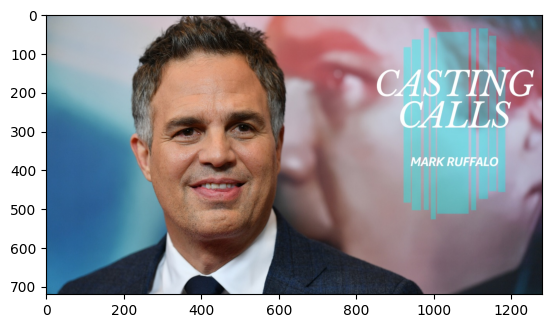

In [10]:
from PIL import Image
import matplotlib.pyplot as plt
image=Image.open(testing)

plt.imshow(image)
#plt.axis('off') #turn off axis
plt.show()

In [11]:
from tensorflow.keras.preprocessing import image
import numpy as np

#model = tf.keras.models.load_model('new_eye_disease_detection_model.h5')

img = image.load_img(testing, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

In [12]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/content/drive/MyDrive/classmodel')  # Replace with your model's path


In [13]:
predictions = model.predict(img_array)

1/1 [==============================] - 1s 707ms/step


In [14]:
predictions

array([[0.17298205, 0.16158585, 0.38900006, 0.17922246, 0.09720957]],
      dtype=float32)

In [15]:
import numpy as np


predicted_class_index = np.argmax(predictions)

class_names = ['Class1', 'Class2', 'Class3', 'Class4', 'Class5']
predicted_class_name = class_names[predicted_class_index]

print(f"Predicted class: {predicted_class_name}")


Predicted class: Class3


In [ ]:
confidence_threshold = 0.5
for pred in predictions:
    max_prob = np.max(pred)
    if max_prob < confidence_threshold:
        print("Unknown class (Out-of-Distribution)")
    else:
        predicted_class_index = np.argmax(pred)
        predicted_class_name = class_names[predicted_class_index]
        print(f"Predicted class: {predicted_class_name}, Probability: {max_prob}")
